# How to get hints. 
hint is used to constrain network to train on specific regions.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
from skimage.filters import try_all_threshold
import skimage.io
import PIL
from PIL import Image
from utils.image_io import *

def plot_two(img1, img2):
    fig, ax = plt.subplots(1, 2, figsize=(15,7))
    ax[0].imshow(img1, cmap='gray')
    ax[1].imshow(img2, cmap='gray')

from skimage.filters import threshold_li, threshold_mean
from skimage.morphology import disk
from skimage.morphology import erosion, dilation, opening, closing, white_tophat
from skimage.morphology import black_tophat, skeletonize, convex_hull_image

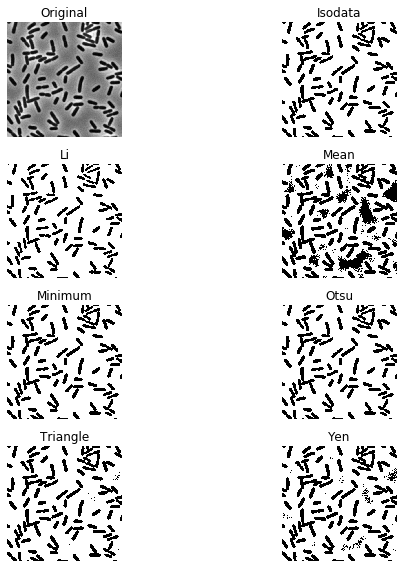

In [2]:
img = skimage.io.imread('DATA/cell/images_1/0010.png', 0)

fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

# choose Li

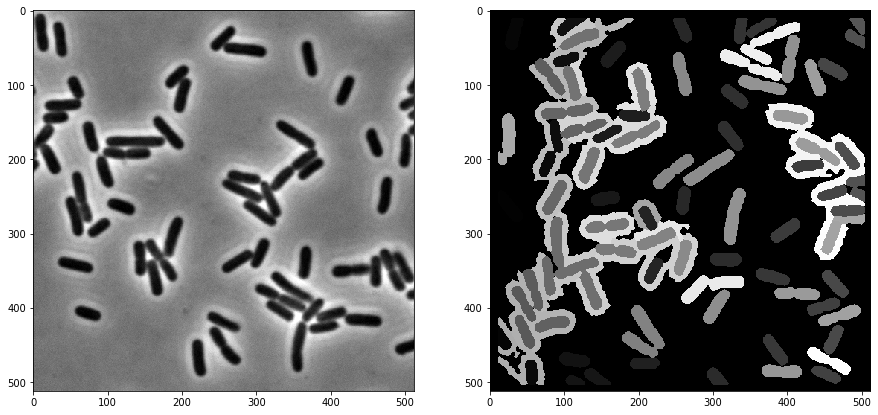

In [51]:
img = skimage.io.imread('DATA/cell/images_1/0000.png', 0)
annot = skimage.io.imread('DATA/cell/raw_masks/0010.png', 0)

plot_two(img, annot)

In [ ]:
# get single cell hint
single = np.zeros(annot.shape)
single[annot == 26] = 1
single[annot != 26] = 0

fg = process_annot(single)
bg = erosion(single, disk(3))

fg = skimage.img_as_ubyte(fg)
bg = skimage.img_as_ubyte(bg)

skimage.io.imsave("DATA/cell/output_fg/0338.png", fg)
skimage.io.imsave("DATA/cell/output_bg/0338.png", bg)

# plot_two(fg, bg)

1. total unsupervised method:  
    threshold_li  
        - closing then dilation give hints  
            this works on original image
        - skeletonize then dilation give hints  
            this only works on no_boundary_label
2. ground truth annotation as hints:  
    dilation then change all >0 to 1

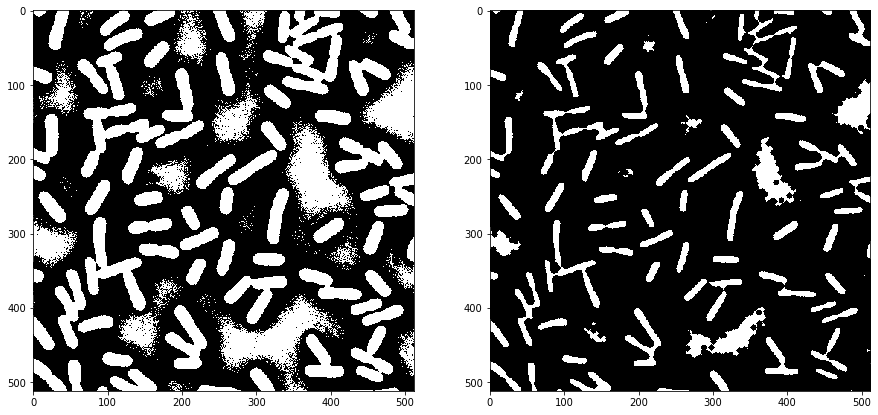

In [7]:
def process_fg(img):
    thresh = threshold_mean(img)

    binary = img < thresh
    binary_small = closing(binary, disk(3))
    binary_new = erosion(binary, disk(4))
#     binary_new = dilation(binary, disk(5))

    return binary, binary_small, binary_new

binary, binary_small, binary_new = process_img(img)
plot_two(binary, binary_new)

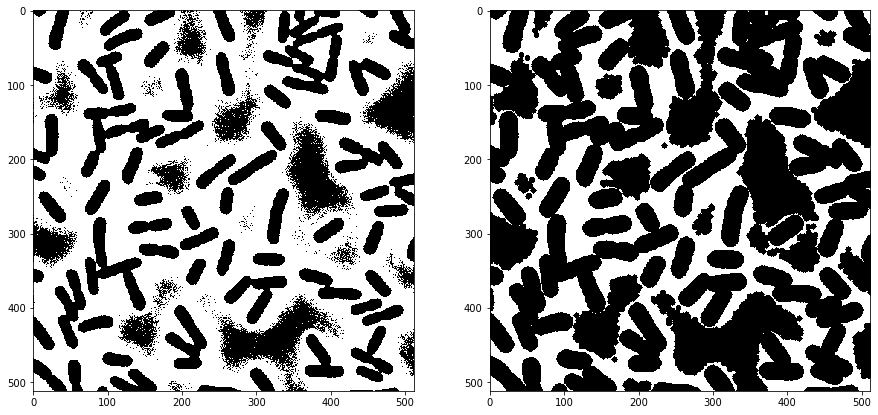

In [8]:
def process_bg(img):
    thresh = threshold_mean(img)

    binary = img > thresh
    binary_small = closing(binary, disk(3))
    binary_new = erosion(binary, disk(4))
#     binary_new = dilation(binary, disk(5))

    return binary, binary_small, binary_new

binary, binary_small, binary_new = process_img(img)
plot_two(binary, binary_new)

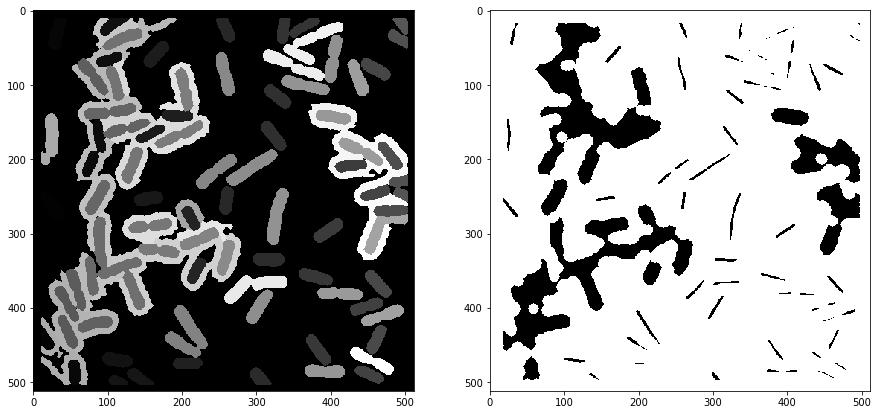

In [8]:
def process_annot(annot):
    annot_ero = erosion(annot, disk(7))

    buffer = np.zeros(annot_ero.shape)
    buffer[annot_ero > 0] = 0
    buffer[annot_ero == 0] = 1 
    
    return buffer

annot_new = process_annot(annot)
annot_new = skimage.img_as_ubyte(annot_new)
plot_two(annot, annot_new)

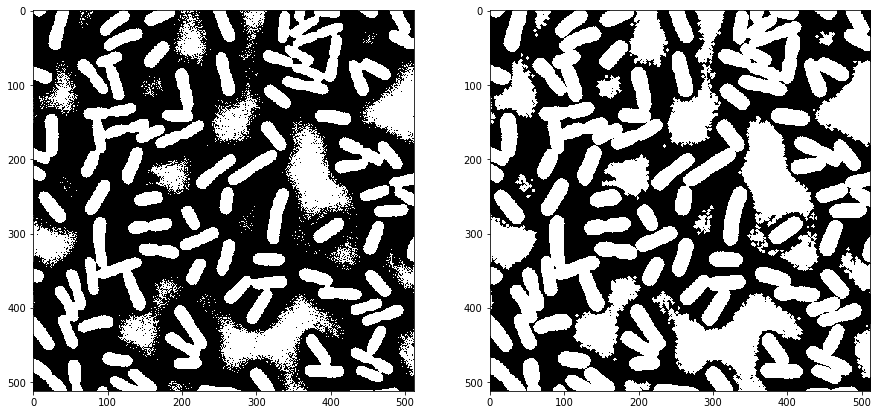

In [38]:
def get_bg(img):
    thresh = threshold_mean(img)
    binary = img <= thresh
    binary_dilate = dilation(binary, disk(2))
    return binary, binary_dilate

binary, bg = get_bg(img)
plot_two(binary, bg)

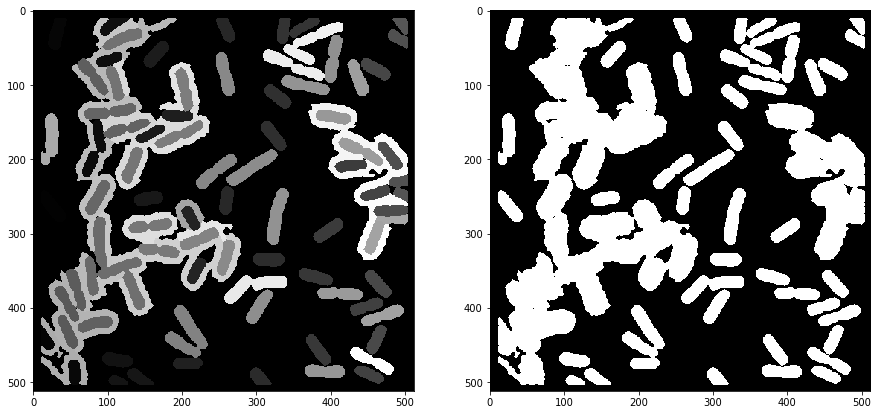

In [42]:
def get_bg_from_annot(annot):
    annot_ero = erosion(annot, disk(3))
    annot_ero = annot
    buffer = np.zeros(annot_ero.shape)
    buffer[annot_ero > 0] = 0
    buffer[annot_ero == 0] = 1 
    
    return buffer

bg = get_bg_from_annot(annot)
plot_two(annot, 1 - bg)